<a href="https://colab.research.google.com/github/Kokogagadol/Capstone-Project---Reddoorz-Business-Analysis/blob/main/PBL_Python_Programing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing Data**


---



In [ ]:
# Mengimport Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Mengimport Dataset yang diperlukan
file_dataset = '/content/drive/MyDrive/Data Set - Reddoorz/Online Budget Hotel Dataset.xlsx'

df_bookings = pd.read_excel(file_dataset, sheet_name= 'Bookings Table')
df_user =  pd.read_excel(file_dataset, sheet_name= 'User Table')
df_property =  pd.read_excel(file_dataset, sheet_name= 'Property Table')

In [ ]:
print(df_bookings.columns)
print(df_user.columns)
print(df_property.columns)

Index(['BOOKING_ID', 'USER_ID', 'PROPERTY_CODE', 'BOOKING_DATE',
       'CHECK_IN_DATE', 'CHECK_OUT_DATE', 'ROOMS', 'NIGHTS', 'ROOM_NIGHTS',
       'REVENUE_DOLLAR'],
      dtype='object')
Index(['USER_ID', 'USER_TYPE', 'USER_GENDER', 'TRAVEL_PURPOSE', 'USER_AGE'], dtype='object')
Index(['PROPERTY_CODE', 'CITY', 'DISTRICT', 'COHORT_DATE', 'BRAND_TYPE',
       'INVENTORY'],
      dtype='object')


In [ ]:
# Menggabungkan Dataset
df = df_bookings.merge(df_user, how='left', on='USER_ID').merge(df_property, how='left', on='PROPERTY_CODE')
df

,BOOKING_ID,USER_ID,PROPERTY_CODE,BOOKING_DATE,CHECK_IN_DATE,CHECK_OUT_DATE,ROOMS,NIGHTS,ROOM_NIGHTS,REVENUE_DOLLAR,USER_TYPE,USER_GENDER,TRAVEL_PURPOSE,USER_AGE,CITY,DISTRICT,COHORT_DATE,BRAND_TYPE,INVENTORY
0,942481721995472,2382984,MAL0084,2024-04-19,2024-04-19,2024-04-20,2,1,2,15.03,New User,Female,Business,27,Malang,North,2020-05-04,Koolkost,55
1,859896400600792,8922581,SUR0320,2024-07-21,2024-07-22,2024-07-23,3,1,3,14.85,Repeat User,Female,Business,21,Surabaya,West,2020-05-07,RedDoorz,30
2,863313142099180,11027905,SUR0381,2021-05-29,2021-06-05,2021-06-06,1,1,1,17.88,New User,Male,Leisure,39,Surabaya,East,2021-08-03,RedPartner,78
3,815705055066134,6964446,BAN0082,2022-03-31,2022-04-05,2022-04-07,1,3,3,27.92,Repeat User,Male,Leisure,56,Bandung,East,2021-07-13,Koolkost,97
4,257574986800513,1387674,BAN0482,2021-06-08,2021-06-14,2021-06-17,1,2,2,22.57,New User,Male,Leisure,47,Bandung,West,2024-05-28,Koolkost,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,263870338457116,5475762,BAN0418,2022-12-01,2022-12-01,2022-12-02,3,1,3,18.24,New User,Male,Leisure,21,Bandung,North,2023-08-22,Koolkost,28
99996,251752438976268,4459005,SUR0211,2021-09-12,2021-09-12,2021-09-15,2,3,6,21.76,Repeat User,Male,Business,30,Surabaya,South,2021-07-28,Koolkost,57
99997,240409361711285,7083729,BAN0462,2024-05-28,2024-06-03,2024-06-04,2,1,2,12.91,Repeat User,Female,Leisure,59,Bandung,West,2022-03-08,RedPartner,82
99998,817444145850194,12469957,JAK0383,2020-06-16,2020-06-16,2020-06-19,1,2,2,22.02,New User,Female,Leisure,28,Jakarta,South,2021-08-02,Koolkost,36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   BOOKING_ID      100000 non-null  int64         
 1   USER_ID         100000 non-null  int64         
 2   PROPERTY_CODE   100000 non-null  object        
 3   BOOKING_DATE    100000 non-null  datetime64[ns]
 4   CHECK_IN_DATE   100000 non-null  datetime64[ns]
 5   CHECK_OUT_DATE  100000 non-null  datetime64[ns]
 6   ROOMS           100000 non-null  int64         
 7   NIGHTS          100000 non-null  int64         
 8   ROOM_NIGHTS     100000 non-null  int64         
 9   REVENUE_DOLLAR  100000 non-null  float64       
 10  USER_TYPE       100000 non-null  object        
 11  USER_GENDER     100000 non-null  object        
 12  TRAVEL_PURPOSE  100000 non-null  object        
 13  USER_AGE        100000 non-null  int64         
 14  CITY            100000 non-null  obje

In [ ]:
# Mengubah nama-nama kolom menjadi lower
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   booking_id      100000 non-null  int64         
 1   user_id         100000 non-null  int64         
 2   property_code   100000 non-null  object        
 3   booking_date    100000 non-null  datetime64[ns]
 4   check_in_date   100000 non-null  datetime64[ns]
 5   check_out_date  100000 non-null  datetime64[ns]
 6   rooms           100000 non-null  int64         
 7   nights          100000 non-null  int64         
 8   room_nights     100000 non-null  int64         
 9   revenue_dollar  100000 non-null  float64       
 10  user_type       100000 non-null  object        
 11  user_gender     100000 non-null  object        
 12  travel_purpose  100000 non-null  object        
 13  user_age        100000 non-null  int64         
 14  city            100000 non-null  obje

Kami mengubah nama kolom menjadi lower case agar mudah untuk di panggil

In [ ]:
# Mengecek dan menghapus duplikasi data
print(f'Jumlah Duplikasi Data : {df.duplicated().sum()}\n')
df = df.drop_duplicates()

# Mengecek Missing Value
print(f'Jumlah Missing Value : \n{df.isna().sum()}')

Jumlah Duplikasi Data : 0

Jumlah Missing Value : 
booking_id        0
user_id           0
property_code     0
booking_date      0
check_in_date     0
check_out_date    0
rooms             0
nights            0
room_nights       0
revenue_dollar    0
user_type         0
user_gender       0
travel_purpose    0
user_age          0
city              0
district          0
cohort_date       0
brand_type        0
inventory         0
dtype: int64


Setelah ketiga data digabungkan dilakukan pengecekan terhadap duplikasi dan missing value dan didapatkan data yang bersih artinya tidak ada duplikasi data dan missing value

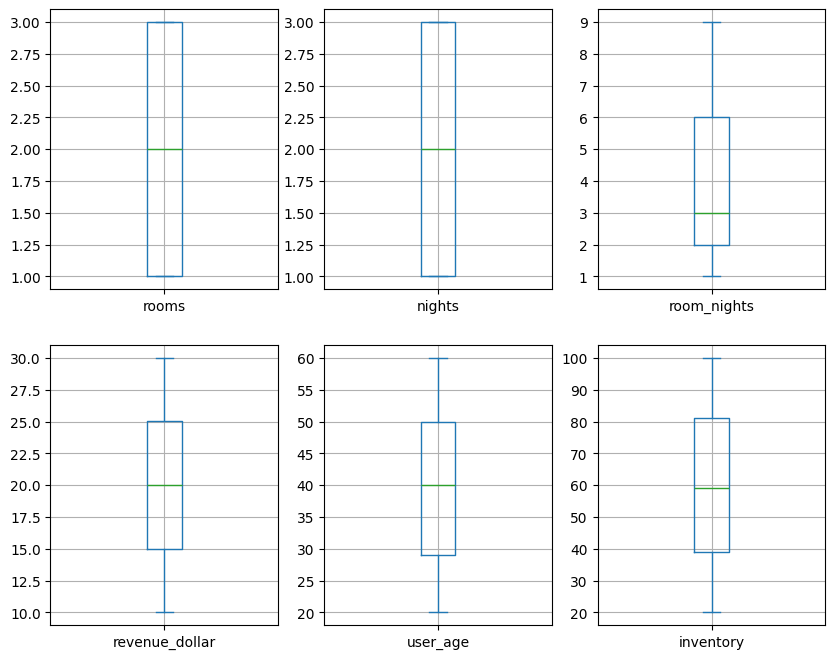

In [ ]:
# Mengecek Outliers Pada Data
df_to_plot = df.select_dtypes(include=('int64','float64'))
df_to_plot = df_to_plot.drop(columns=['booking_id','user_id'])

df_to_plot.plot(subplots=True, layout=(2,3), kind='box', figsize=(10,8), grid=True)
plt.subplots_adjust()

Setelah di lihat pada boxplot diatas tidak ditemukan pencilan data atau outliers pada features atau kolom-kolom yang bertipe numeric

# **Exploratory Data Analysis**


---



**1. Booking Duration and Booking Lead Time:**

Extract new features from booking data related to the duration of stay and the lead time (the time between the booking date and check-in date).

* Stay Duration: The difference (in days) between CHECK_OUT_DATE and CHECK_IN_DATE for each booking.

* Lead Time: The difference (in days) between BOOKING_DATE and CHECK_IN_DATE.


Visualize the distribution of both features:
-	The Stay Duration to analyze how long customers tend to stay.
-	Lead Time to observe how far in advance customers typically book.


In [ ]:
# Menambahkan kolom baru (Stay duraion dan Lead Time)
df['stay_duration'] =  (df['check_out_date']-df['check_in_date']).dt.days
df['lead_time'] =  (df['check_in_date'] - df['booking_date']).dt.days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   booking_id      100000 non-null  int64         
 1   user_id         100000 non-null  int64         
 2   property_code   100000 non-null  object        
 3   booking_date    100000 non-null  datetime64[ns]
 4   check_in_date   100000 non-null  datetime64[ns]
 5   check_out_date  100000 non-null  datetime64[ns]
 6   rooms           100000 non-null  int64         
 7   nights          100000 non-null  int64         
 8   room_nights     100000 non-null  int64         
 9   revenue_dollar  100000 non-null  float64       
 10  user_type       100000 non-null  object        
 11  user_gender     100000 non-null  object        
 12  travel_purpose  100000 non-null  object        
 13  user_age        100000 non-null  int64         
 14  city            100000 non-null  obje

In [ ]:
df.head()

,booking_id,user_id,property_code,booking_date,check_in_date,check_out_date,rooms,nights,room_nights,revenue_dollar,...,user_gender,travel_purpose,user_age,city,district,cohort_date,brand_type,inventory,stay_duration,lead_time
0,942481721995472,2382984,MAL0084,2024-04-19,2024-04-19,2024-04-20,2,1,2,15.03,...,Female,Business,27,Malang,North,2020-05-04,Koolkost,55,1,0
1,859896400600792,8922581,SUR0320,2024-07-21,2024-07-22,2024-07-23,3,1,3,14.85,...,Female,Business,21,Surabaya,West,2020-05-07,RedDoorz,30,1,1
2,863313142099180,11027905,SUR0381,2021-05-29,2021-06-05,2021-06-06,1,1,1,17.88,...,Male,Leisure,39,Surabaya,East,2021-08-03,RedPartner,78,1,7
3,815705055066134,6964446,BAN0082,2022-03-31,2022-04-05,2022-04-07,1,3,3,27.92,...,Male,Leisure,56,Bandung,East,2021-07-13,Koolkost,97,2,5
4,257574986800513,1387674,BAN0482,2021-06-08,2021-06-14,2021-06-17,1,2,2,22.57,...,Male,Leisure,47,Bandung,West,2024-05-28,Koolkost,57,3,6


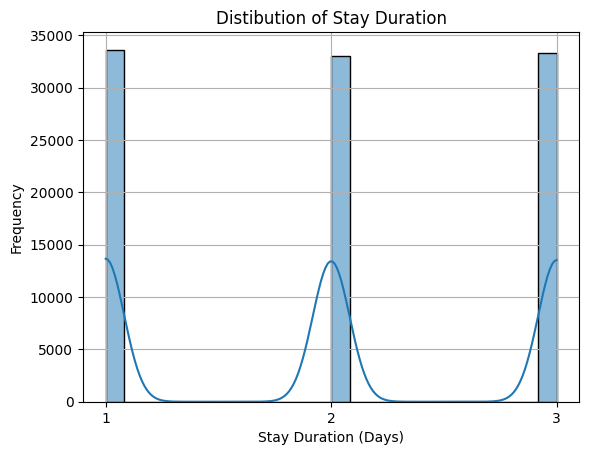

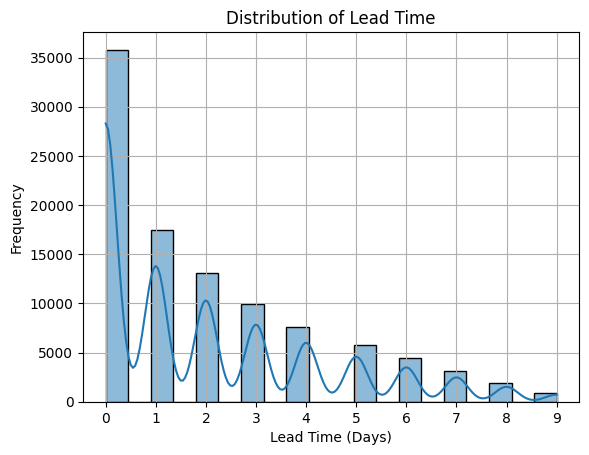

In [ ]:
# Visualisasi Distribusi data Stay Duration dan Lead Time
sns.histplot(data=df, x='stay_duration', kde=True)
plt.title('Distibution of Stay Duration')
plt.xlabel('Stay Duration (Days)')
plt.ylabel('Frequency')
plt.xticks([1,2,3])
plt.grid()
plt.show()

print('\n')

sns.histplot(data=df,bins=20, x='lead_time', kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.grid()
plt.show()


*   **Stay Duration :** Dalam grafik di atas bisa dilihat bahwa untuk sebaran waktu menginap atau lamanya pelanggan menginap adalah sebanyak 1, 2 dan 3 hari dengan jumlah pemesanan yang lumayan merata diatas 30 ribu pemesanan
*   **Lead Time:** Sedangkan untuk lamanya waktu tunggu pelanggan dari waktu booking ke check in berjarak antara 0 hari sampai dengan 9 hari tetapi kebanyakan para customer melakuan booking serta check in dilakukan di hari yang sama artinya mereka tidak memiliki waktu tunggu. Distribusi pemesanan yang tidak memiliki waktu tunggu atau lead timenya 0 adalah sebanyak 35 ribu lebih pemesanan atau 35% dari jumlah pemesanan. Untuk jumlah pemesanan dengan waktu tunggu terlama yaitu 9 hari dengan jumlah dibawah 5 ribu pemesanan dengan persentasenya sebesar 0,91%



---




**2. Revenue per Night and Booking Revenue Features:**

Extract and analyze new features related to revenue, such as Revenue per Night and Total Booking Revenue.

* Revenue per Night by dividing the total booking revenue (REVENUE_DOLLAR) by the number of room nights (ROOM_NIGHTS).
* Total Booking Revenue by grouping the dataset by USER_ID and summing up the total revenue for each customer.

Show the top 10 customers in terms of Total Booking Revenue.


   user_id  total_booking_revenue
0  6534621                2708.86
1  7818238                2651.86
2  6742780                2596.37
3  2797960                2584.47
4  1060239                2548.25
5  1066789                2545.37
6  1387674                2544.78
7  1654979                2530.24
8  9726170                2524.71
9  3711707                2523.20 



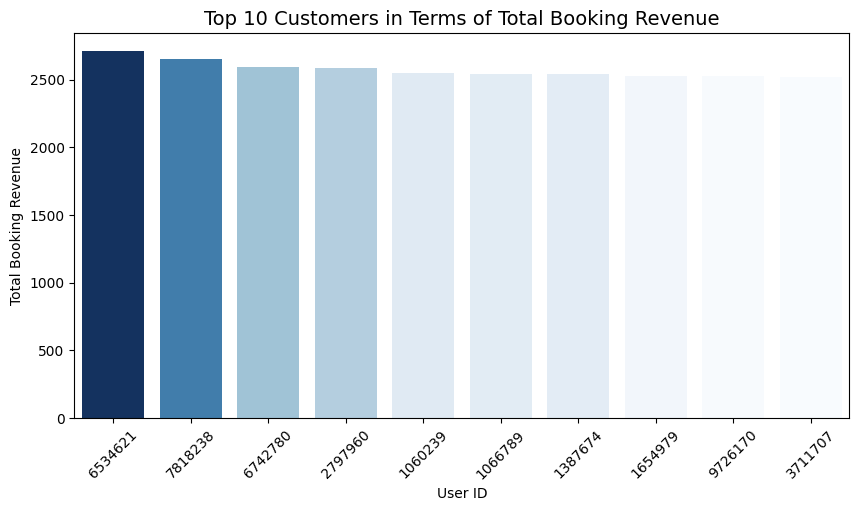

In [ ]:
# Menambahkan Kolom baru (Revenue per Night dan Total Booking Revenue)
df['revenue_per_night'] = df['revenue_dollar'] / df['room_nights']
df['total_booking_revenue'] = df.groupby('user_id')['revenue_dollar'].transform('sum')

# Menampilkan 10 Customer dengan Total Booking Revenue Tertinggi
top_10_customers = df[['user_id','total_booking_revenue']].drop_duplicates().sort_values(by='total_booking_revenue', ascending=False).head(10).reset_index(drop=True)
print(top_10_customers,'\n')

# Visualisasi 10 Customer dengan total booking revenue tertinggi
plt.figure(figsize=(10,5))
sns.barplot(x='user_id',y='total_booking_revenue', data=top_10_customers, palette='Blues',order=top_10_customers['user_id'],hue='total_booking_revenue',dodge=False)
plt.title('Top 10 Customers in Terms of Total Booking Revenue', fontsize=14, fontweight=10)
plt.xlabel('User ID')
plt.xticks(rotation=45)
plt.ylabel('Total Booking Revenue')
plt.legend([], [], frameon=False)
plt.show()


In [ ]:
profil_customer = df[['user_id','user_gender','user_age','total_booking_revenue','city','stay_duration','travel_purpose']].drop_duplicates().sort_values(by='total_booking_revenue', ascending=False).head(1).reset_index(drop=True)
print(profil_customer.loc[0])

user_id                   6534621
user_gender                Female
user_age                       58
total_booking_revenue     2708.86
city                      Jakarta
stay_duration                   2
travel_purpose           Business
Name: 0, dtype: object


Di atas merupakan total pendapatan booking tertinggi dari 10 pelanggan. Pelanggan dengan user Id 6534621 merupakan yang paling tinggi dibandingkang dengan user yang lain dalam hal kontribusi terhadap revenue booking dimana user tersebut bergender perempuan yang berasal dari kota Jakarta dengan durasi menginap selama 2 hari adapaun tujuan menginap dari user tersebut adalah kepentingan bisnis

---



**3. Property Performance and Occupancy Rate:**

Calculate and visualize new features related to

* Property Occupancy Rate
* Total Revenue per Property.

Occupancy Rate =(Total Room Nights Booked) / (Inventory x Days Active)  

where "Days Active" is the difference between CHECK_IN_DATE and COHORT_DATE (from the Property Table).

Show the Occupancy Rate for the top 10 properties and the correlation between Occupancy Rate and Total Revenue per Property.



In [ ]:
# Membuat Kolom Baru Days Active
df['days_active'] = (df['check_in_date'] - df['cohort_date']).dt.days

# # Menambakan kolom baru Occupancy Rate
df['occupancy_rate'] = df['room_nights'] / (df['inventory'] * df['days_active'])

# Melakukna Pengkondisian Apabila Hari Aktif nol atau negatif untuk menghindari kesalahan pembagian
df.loc[df['days_active'] <= 0, 'occupancy_rate'] = 0

# Menambahkan Kolom Baru Total Revenue Per Property
total_revenue_per_property = df.groupby('property_code')['total_booking_revenue'].sum()
df = df.merge(total_revenue_per_property.rename('total_revenue_per_property'),
                  on='property_code')

  property_code  occupancy_rate
0       JAK0304        0.250000
1       MAL0499        0.230769
2       MAL0217        0.225000
3       YOG0431        0.214286
4       SUR0287        0.200000
5       BAN0229        0.150000
6       BAN0332        0.142857
7       SUR0166        0.134328
8       JAK0124        0.125000
9       YOG0449        0.120000 



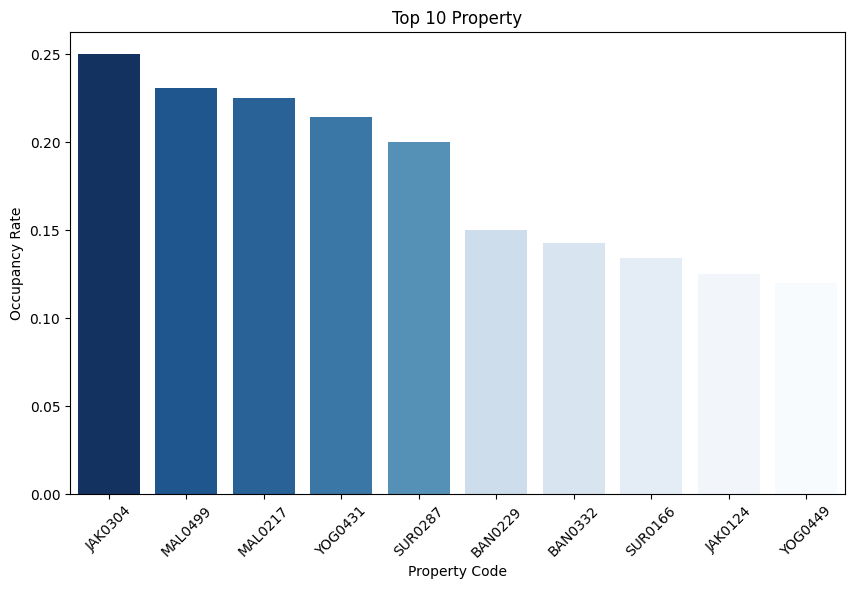

In [ ]:
top_10_properties = df[['property_code', 'occupancy_rate']].drop_duplicates().sort_values(by='occupancy_rate', ascending=False).head(10).reset_index(drop=True)
print(top_10_properties,'\n')

plt.figure(figsize=(10,6))
sns.barplot(x='property_code', y='occupancy_rate',data=top_10_properties, palette='Blues',hue='occupancy_rate')
plt.title('Top 10 Property')
plt.xlabel('Property Code')
plt.ylabel('Occupancy Rate')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)
plt.show()

In [ ]:
top_property = df[['property_code', 'occupancy_rate','city','district','brand_type','inventory']].drop_duplicates().sort_values(by='occupancy_rate', ascending=False).head(10).reset_index(drop=True)
print(top_property.loc[0])

property_code      JAK0304
occupancy_rate        0.25
city               Jakarta
district             South
brand_type        Koolkost
inventory               36
Name: 0, dtype: object


Kita bisa melihat bahwa untuk property dengan rate tertinggi ada pada property dengan kode JAK0304, dengan rate sebesar 0.250000. Property tersebut berada di kota Jakarta dengan brand type nya yaitu Koolkost adapun jumlah inventory dari property tersebut sebanyak 36

In [ ]:
# Menghitunga Korelasi Antara Occupancy Rate dengan Total Revenue Per Property
correlation = df[['occupancy_rate', 'total_revenue_per_property']].corr().iloc[0, 1]
correlation

1.0521750205043423e-05

Setelah menghitung korelasi antara occupancy rate dengan total revenue per property didapatkan hasil sebesar 1.0521750205043423e-05 angka tersebut menunjukan bahwa tidak ada korelasi atau hubungn yang linear diantara dua variabel tersebut. Karena angka sebenarnya dari hasil tersebut adalah 0.00001

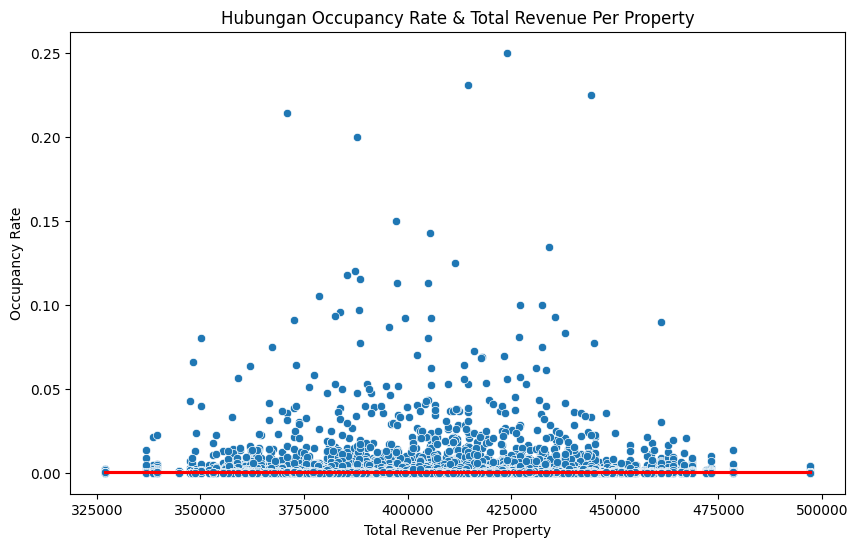

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='occupancy_rate',x='total_revenue_per_property',data=df)
sns.regplot(y='occupancy_rate', x='total_revenue_per_property', data=df, scatter=False, color='red')
plt.title('Hubungan Occupancy Rate & Total Revenue Per Property')
plt.xlabel('Total Revenue Per Property')
plt.ylabel('Occupancy Rate')
plt.show()

Begitupun jika di lihat dari scatterplot di atas menunjukan tidak ada hubungan yang linear antara occupancy rate dan Total revenue per property

In [ ]:
df['total_revenue_per_property'].describe()

,total_revenue_per_property
count,100000.000000
mean,406286.249498
std,28517.157447
min,327031.850000
25%,386557.850000
50%,406490.350000
75%,426784.530000
max,497060.780000


In [ ]:
df['property_code'].count()

100000